![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Calculando um autovalor qualquer

## Questão 1: Iteração inversa

Podemos calcular um autovalor da matriz $A$ próximo de $a$
ao calcular um autovalor da matriz $M = (A - aI)^{-1}$.
Observe que "multiplicar" por $M$ é equivalente a resolver o sistema linear com matriz $A - aI$,
o que permite usar `np.linalg.solve` para fazer as iterações.

Obs: note que, após calcular um par autovetor-autovalor de $M$,
será necessário fazer operações simples para converter em um par autovetor-autovalor de $A$.

In [136]:
def any_eigen(A, a, tol=1e-6):
    """
    Encontra o par autovetor-autovalor de 'A' de autovalor mais próximo de 'a'.
    Retorna, também, o número de iterações.
    """
    n,m = np.shape(A)
    assert n==m, 'A must be square'

    u = np.random.rand(n)
    i = np.identity(n)
    M_i = A - a*i
    ns = 0 
    xk = u/u[np.argmax(np.abs(u))]
    while True:
        ns +=1
        yk = np.linalg.solve(M_i,xk)
        b = np.dot(yk,xk)/np.dot(xk,xk)
        b = 1/b + a
        if abs(np.sum(A@xk - b*xk))<=tol:
            break    
        xk = yk/yk[np.argmax(np.abs(yk))]
    return xk, b, ns



In [149]:
A = np.array([[125,5],[0,300]])
u, l, n = any_eigen(A, 234.567)
assert np.allclose(A@u, l*u, rtol=1e-4)

In [150]:
A = np.array([[125,5],[0,300]])
u, l, n = any_eigen(A, 234.567, tol=1e-8)
assert np.allclose(A@u, l*u, rtol=1e-6)

In [152]:
A = np.array([[125,5],[0,300]])
u, l, n = any_eigen(A, 234.567, tol=1e-10)
assert np.allclose(A@u, l*u, rtol=1e-8)

[8.524558836597862e-11, 1.4779288903810084e-12]


Qual o erro entre $Au$ e $\lambda u$?
Como você explica isso, dadas as tolerâncias?

In [153]:
print([np.abs(a - b) for a,b in zip(A@u, l*u)])

[8.524558836597862e-11, 1.4779288903810084e-12]


O erro é menor do que a tolerância passada para o método any_eigen. Isso acontece porque dentro do método, diversos calculos com a matriz A são feitos, então o erro aumenta até que se encontre valores satisfatórios. Os valores retornados são usados em cálculos únicos, usando a matriz A "pura", portanto há menos erro "acumulado" quando calculado o erro em np.allclose(). 

In [154]:
np.random.seed(99)
u1, l1, n1 = any_eigen(A, 234.567, tol=1e-8)
u2, l2, n2 = any_eigen(A, 234.567, tol=1e-8)
assert np.allclose(u1, u2)
assert np.isclose(l1, l2)
print(n1, n2)

48 54


Explique os testes e o `print` da caixa acima.

Os testes verificam a "precisão" do método, isto é, quando os parametros são os mesmos, o resultado deve ser o mesmo, ou muito próximos entre si. As varições mínimas advêm não só dos erros cometidos pelo computador em si, mas pela variação do chute inicial em "u = np.random.rand(n)". Por este motivo, pode-se haver um número diferente de iterações, como mostra o print na caixa acima.  

## Questão 2: Velocidade de convergência I

Faça um gráfico do número de iterações necessários, em função da tolerância,
para encontrar o autovalor mais próximo de 234.567 da matriz

$$ A = \begin{bmatrix} 125 & 5 \\ 0 & 300 \end{bmatrix}. $$

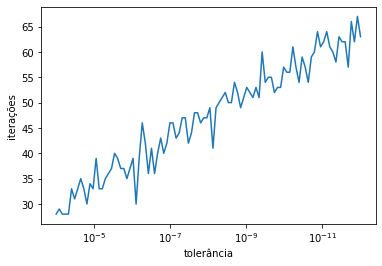

In [272]:
A = np.array([[125, 5],[0, 300]])
a = 234.567
tols = np.logspace(-4,-12, num=100)
ns = []
for tol in tols:
    _, _, n = any_eigen(A,a,tol)
    ns.append(n)
plt.semilogx(tols, ns)
plt.xlabel("tolerância")
plt.ylabel("iterações")

ax = plt.gca()
ax.invert_xaxis()

In [174]:
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

In [175]:
l = ax.lines[0]
xs = l.get_xdata()
ys = l.get_ydata()
assert min(xs) < 1e-10 < 1e-3 < max(xs)
assert 2 < min(ys) < 20 < max(ys) < 100

In [176]:
ax = None

O que você observa do gráfico?

Cresce linearmente com o ***logaritmo*** da tolerância, com algumas flutuações. Se usarmos uma escala normal no eixo x, das tolerâncias, podemos notar que há um intervalo que cresce linearmente, depois cresce abruptamente, quase que tendendo para o infinito conforme diminuimos mais a tolerância.

## Questão 3: Velocidade de convergência II

Agora, considere diferentes "chutes" para os autovalores de $A$ entre 1 e 1000,
e faça um gráfico com as velocidades de convergência para todos eles.

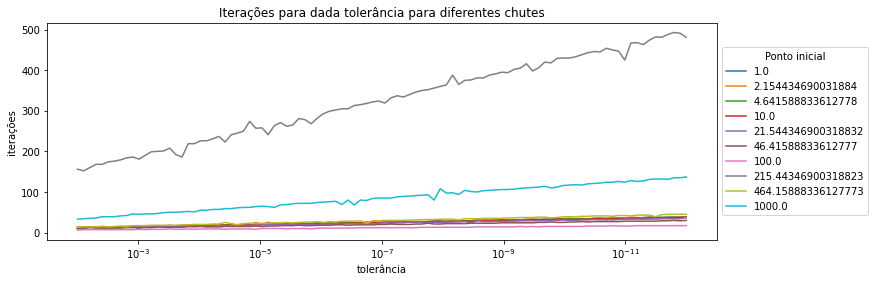

In [269]:
plt.figure(figsize=(12,4))
chutes = np.logspace(0,3,num=10)
tols = np.logspace(-2,-12, num=100)
for chute in chutes:
    ns = []
    for tol in tols:
        _, _, n = any_eigen(A,chute,tol)
        ns.append(n)
    plt.semilogx(tols, ns, label=f"{chute}")
plt.xlabel("tolerância")
plt.ylabel("iterações")
plt.title("Iterações para dada tolerância para diferentes chutes")
plt.legend(title="Ponto inicial", loc="center left", bbox_to_anchor=(1.0, 0.5))
ax = plt.gca()
ax.invert_xaxis()

In [185]:
assert len(ax.lines) == 10
assert ax.get_title() != ""

In [183]:
ax = None

O que você percebe no gráfico anterior?
Se necessário, faça outro gráfico, ou outras contas.

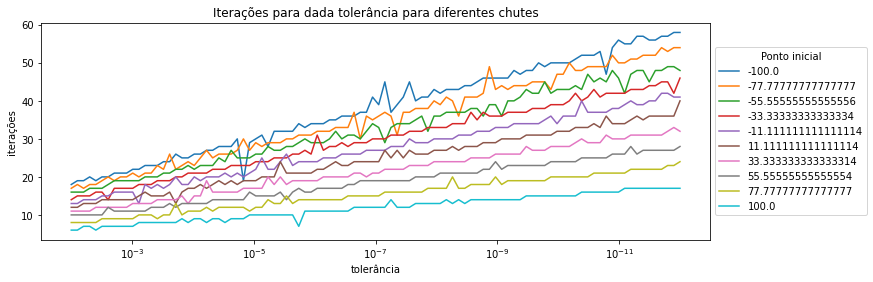

In [268]:
plt.figure(figsize=(12,4))
chutes = np.linspace(-100,100, num=10)
tols = np.logspace(-2,-12, num=100)
for chute in chutes:
    ns = []
    for tol in tols:
        _, _, n = any_eigen(A,chute,tol)
        ns.append(n)
    plt.semilogx(tols, ns, label=f"{chute}")
plt.xlabel("tolerância")
plt.ylabel("iterações")
plt.title("Iterações para dada tolerância para diferentes chutes")
plt.legend(title="Ponto inicial", loc="center left", bbox_to_anchor=(1.0, 0.5))
ax = plt.gca()
ax.invert_xaxis()

todos tem um perfil similar: com escala logarítimica no eixo x, da tolerância, todos se aproximam, em aparência, à uma reta inclinada com pequenas flutuações. Alguns estão bem próximos uns dos outros, enquanto outros poucos se distanciam das demais curvas. Além disso, parecem convergir a um valor de iterações, conforme aumento da tolerância. Parece haver um valor ótimo, no qual os chutes, conforme mais próximos dele, tomam menos iterações no geral. O segundo gráfico mostra o aumento do número de iterações conforme o chute se distancia de 100. Mas o primeiro gráfico mostra que há exceção: O chute 1000 é bem mais longe do chute 100, com a curva com menores números de iterações, do que o chute 215.44(...), no entanto, a curva do 1000 está bem mais próxima da do 100, usa menos números de iterações, do que a curva deste outro. 

## Questão 4: Velocidade de convergência III

Agora, considere as matrizes:

$ \begin{align*}
A_x  & = \begin{bmatrix} 125 & x \\ 0 & 300 \end{bmatrix} \\
\end{align*} $

com $x$ variando entre $1$ e $1000$.

Quais são os autovalores destas matrizes?

300 e 125

Faça um gráfico do número de iterações em função da tolerância, sempre começando de 234.567,
para as várias matrizes $A_x$.

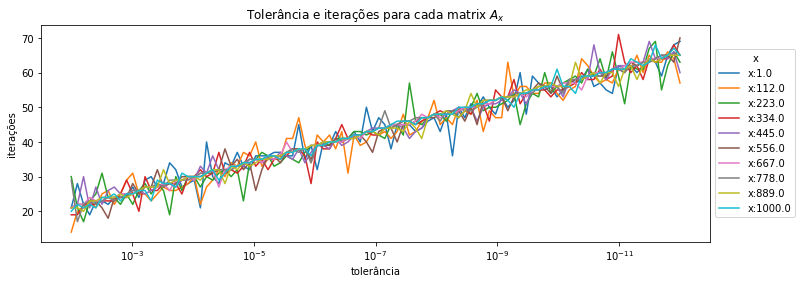

In [277]:
plt.figure(figsize=(12,4))
a = 234.567
xs = np.linspace(1,1000, num=10)

for x in xs:
    A = np.array([[125, x],[0, 300]])
    tols = np.logspace(-2,-12, num=100)
    ns = []
    for tol in tols:
        _, _, n = any_eigen(A,a,tol)
        ns.append(n)
    plt.semilogx(tols, ns, label=f"x:{x}")

plt.xlabel("tolerância")
plt.ylabel("iterações")
plt.title("Tolerância e iterações para cada matrix $A_x$")
plt.legend(title="x", loc="center left", bbox_to_anchor=(1.0, 0.5))
ax = plt.gca()
ax.invert_xaxis()

In [278]:
assert len(ax.lines) >= 10
assert ax.get_title() != ""

In [279]:
ax = None

O que mudou?
Porquê você acha que isso acontece?

Todas as curvas estão muito mais próximas, desconsiderando as flutuações, diferente das diferentes curvas dos estudos anteriores. A matriz $A_x$, embora mude para cada x, tem sempre os mesmos autovalores, pois o elemento 0 "cancela" a influencia do elemento x na hora de calcular os autovalores e todos os calculos começar pelo mesmo ponto. Por isso é de se esperar que se comportem semelhantemente 